<a href="https://colab.research.google.com/github/SpeedKillsx/TPs-Traitement-et-Analyse-D-images/blob/main/TP4_TAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
image_bin = np.array([
                        [0,0,0,0,0],
                        [0,1,1,1,0],
                        [0,1,1,1,0],
                        [0,0,0,0,0],
                        [0,0,0,0,0]
])

In [ ]:
image_bin

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

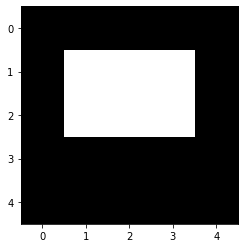

In [ ]:
plt.imshow(image_bin, cmap="gray")

In [ ]:
# paramétres de MORAVEC
S= 2  # Seuil
F= 3  # Taille de la fenêtre
U= [[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]]# Déplacements
FN = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]] #a et b de la fenêtre 

#qFN= deque(FN)


# Algorithme de Moravec

## Calcule du vecteur V pour chaque pixel

In [ ]:

def v(i,j,U,FN):
  nu=0
  V = np.zeros(8) # vecteur de
  
  for Udep in U:
    u1,v1=Udep
    var=0
    for FNdep in FN:
      a1,b1=FNdep
      x1=i+u1+a1
      y1=j+v1+b1
      x2=i+a1
      y2=j+b1
      var=var+(( image[x1,y1] - image[x2,y2] )**2)
    V[nu]=var  
    nu=nu+1 

  return np.min(V) # je retourne le minimum de chaque vecteur v de chaque pixel

## Calcul de la carte de Coins

In [ ]:
def CarteDesCoins(image):
  C = np.zeros_like(image)
  for i in range(2,C.shape[0]-2):
    for j in range(2,C.shape[1]-2):
      C[i, j] = v(i,j,U,FN)
  return C

## Implementation de l'algorithme de Moravec

In [ ]:
def MoravecAlgorithm(image,seuil, U,FN):
  Moravec_image = np.zeros_like(image)
  Cmin = np.zeros_like(image)
  Cmin  = CarteDesCoins(image)
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if Cmin[i,j] >=seuil:
        Moravec_image[i,j] = 1
  return Moravec_image

In [ ]:
image = cv.imread("/content/drive/MyDrive/TAI_ressources/TP2/im2.png",0)
image_moravec = np.zeros_like(image)

In [ ]:
image.shape

(320, 452)

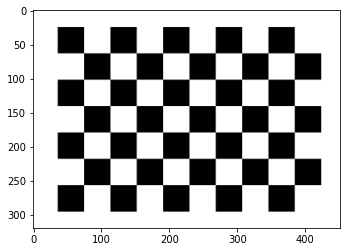

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
image_moravec = MoravecAlgorithm(image,S,U,FN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


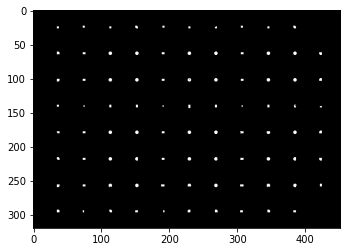

In [ ]:
plt.imshow(image_moravec, cmap="gray")

#Algorithme de Harris

In [ ]:
A= [[-1,2,0],[0,3,4],[0,0,7]]
B=[[-1,2,2],[2,2,-1],[1,-2,1]]
val1, vec1 = np.linalg.eig(A)
val2, vec2 = np.linalg.eig(A)

In [ ]:
val1

array([-1.,  3.,  7.])

In [ ]:
vec1

array([[1.        , 0.4472136 , 0.17407766],
       [0.        , 0.89442719, 0.69631062],
       [0.        , 0.        , 0.69631062]])

In [ ]:
val2

array([-1.,  3.,  7.])

In [ ]:
vec2

array([[1.        , 0.4472136 , 0.17407766],
       [0.        , 0.89442719, 0.69631062],
       [0.        , 0.        , 0.69631062]])